# Gausova Kvadratura a Legendrovy polynomy

imports:

In [1]:
import Kvadratury as kv
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
import numpy as np


# Legendre Polynomials

#### Legendre:

(1000,)


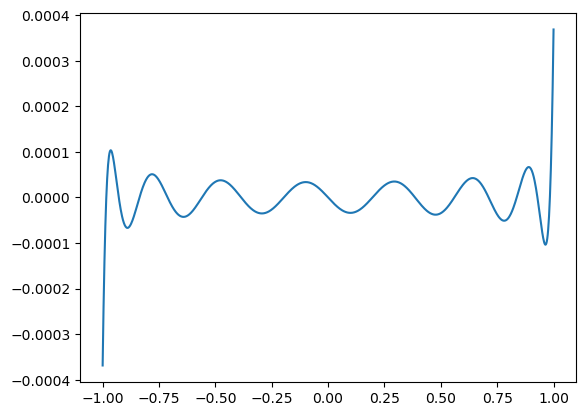

In [9]:

matrix_size=15
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kv.legendre(t, 30)
plt.plot(t, l[matrix_size])

#### Normal Legendre:

(1000,)


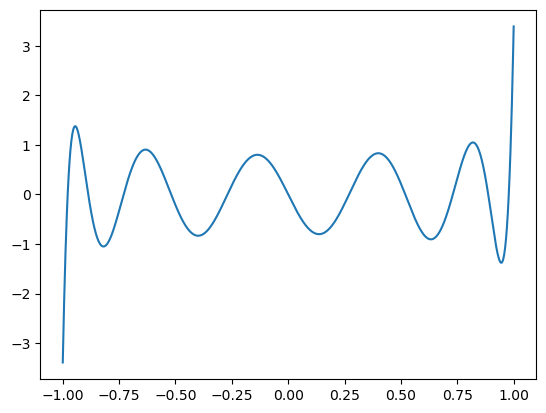

In [10]:
matrix_size=11
t = np.linspace(-1, 1, 1000)
print(t.shape)
l = kv.legendre_normal(t, 50)
plt.plot(t, l[matrix_size])

#### Legendre over interval (a,b):

In [ ]:
matrix_size=15
a = 0
b = 10
t = np.linspace(a, b, 1000)
print(t.shape)
l = kv.legendre_int(t, 50, a, b)
plt.plot(t, l[matrix_size])

#### Normal Legendre over interval (a,b):

In [ ]:
matrix_size=15
a = 0
b = 5
t = np.linspace(a, b, 1000)
print(t.shape)
l = kv.legendre_normal_int(t, 100, a, b)
plt.plot(t, l[matrix_size])

# Calculating integrals using Gauss Quadrature rule and a Jakobi matrix

In [ ]:
matrix_size=100
f = lambda x: x**2
fI = lambda x: x**3/3
Gq = kv.quadrature(f,matrix_size)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(1)-fI(-1))
print("error:", Gq - (fI(1)-fI(-1)))

##### over interval (a,b)

In [2]:
matrix_size = 100
a = 10
b = 25
f = lambda x: np.sin(x)
fI = lambda x: -np.cos(x)
Gq = kv.quadrature_int(f, matrix_size, a, b)
print("Gauss-quadrature:", Gq)
print("actual value of integral:", fI(b)-fI(a))
print("error:", Gq - (fI(b)-fI(a)))

Gauss-quadrature: -1.8302743409399347
actual value of integral: -1.830274340939926
error: -8.659739592076221e-15


## Konvergation graphs 

0.0


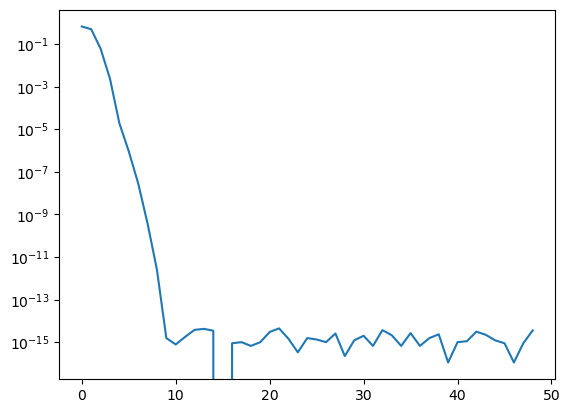

In [3]:
matrix_size = 50
def f(x): return np.exp(x)*np.sin(np.pi*x)
res = []
for i in range(1, matrix_size):
    res.append(abs(kv.quadrature(f, i) - 0.67932618340209469947815632370907306163177032877927709391270561911906360182))
plt.plot(res)
plt.yscale('log')
print(res[15])

In [ ]:
matrix_size=50
f = lambda x: x**30
fI = lambda x: x**31/31
res = []
for i in range(1, matrix_size):
    res.append(abs(kv.quadrature(f, i) - (fI(1)-fI(-1))))
plt.plot(res)
plt.yscale('log')

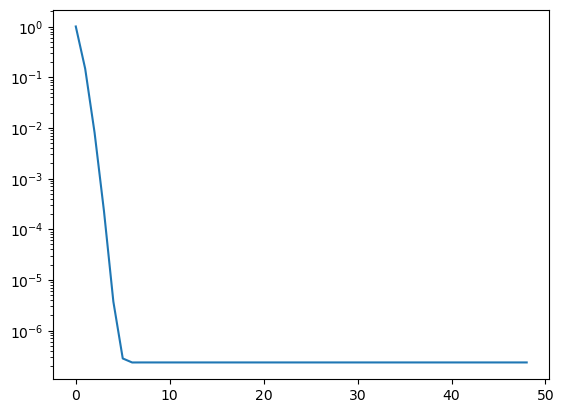

In [2]:
matrix_size=50
a = 5
b = 10
f = lambda x: np.sin(x)/np.log(5*x)
fI = 0.287556
res = []
for i in range(1, matrix_size):
    res.append(abs(kv.quadrature_int(f, i, a, b) - fI))
plt.plot(res)
plt.yscale('log')

over interval <a,b>

In [ ]:
matrix_size=50
f = lambda x: np.sin(x)

#### 2D polynomials:

(100, 120)
(100, 120)


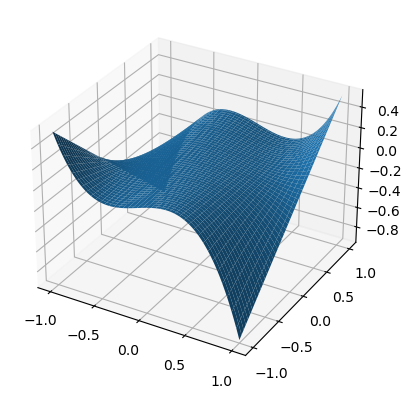

In [63]:
nx, ny = (120, 100)
a = -1
b = 1
c = -1
d = 1
xx = np.linspace(a, b, nx)
yy = np.linspace(c, d, ny)
X, Y = np.meshgrid(xx, yy)
l = kv.generate2DLegendre(X, Y, 500)
print(Y.shape)
print(X.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, l[2])
plt.show()


#### 2D quadrature over interval <a,b>x<c,d>:

In [46]:
nx=500
ny=600
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701

print(kv.quadrature_2d_int(f, nx, ny, a, b, c, d)-fI)

-2.733924198139448e-15


0.07714107601915704


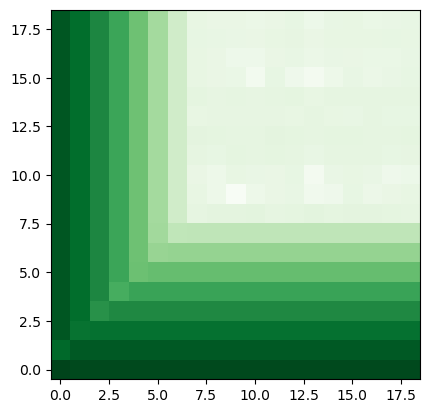

In [62]:
nx=20
ny=20
minx = 1
miny = 1
a = 5
b = 10
c = 10
d = 13
def f(x,y):
    return np.sin(x+y)/np.log(5*y)
fI = 0.07714107601915701
print(kv.quadrature_2d_int(f, nx, ny, a, b, c, d))

xx=np.arange(minx, nx)
yy=np.arange(miny, ny)

X, Y = np.meshgrid(xx, yy)
res = []
for x in xx:
    res_line = []
    for y in yy:
        res_line.append(kv.quadrature_2d_int(f, x, y, a, b, c, d))
    res.append(res_line)
res = np.array(res)
Z = abs(res-fI)
fig, ax = plt.subplots()

ax.imshow(Z, origin='lower', cmap=colormaps['Greens'], norm=colors.LogNorm())
plt.show()


---

testing of integrals in the Galerkin Method for Spectral Decomposition 2.4.1, page 38, (2.13)

In [38]:
a = 0
b = 5
c = -2
d = 3
l = lambda x : kv.legendre_normal_int(x, 100, a, b)

matrix_size = 4
matrix = np.zeros((matrix_size,matrix_size))
for i in range(matrix_size):
    for j in range(matrix_size):
        matrix[i,j] = kv.quadrature_int(lambda x : l(x)[i]*l(x)[j], 100, a, b)
print(matrix)

[[5.00000000e+00 4.44175946e-15 5.90169944e-01 2.75864401e-14]
 [4.44175946e-15 5.00000000e+00 2.79784876e-14 7.63688812e-01]
 [5.90169944e-01 2.79784876e-14 5.06966011e+00 3.46649792e-14]
 [2.75864401e-14 7.63688812e-01 3.46649792e-14 5.11664412e+00]]


In [36]:
l = lambda x : kv.legendre_normal(x, 100)

matrix_size = 4
matrix = np.zeros((matrix_size,matrix_size))
for i in range(matrix_size):
    for j in range(matrix_size):
        matrix[i,j] = kv.quadrature(lambda x : l(x)[i]*l(x)[j], 100)
print(matrix)

[[2.00000000e+00 1.33031607e-15 2.36067977e-01 1.06871977e-14]
 [1.33031607e-15 2.00000000e+00 1.01368566e-14 3.05475525e-01]
 [2.36067977e-01 1.01368566e-14 2.02786405e+00 1.32532874e-14]
 [1.06871977e-14 3.05475525e-01 1.32532874e-14 2.04665765e+00]]


V obou mela vyjit jednotkova matice....

[[2.00000000e+00 1.33031607e-15 2.36067977e-01 1.06871977e-14]
 [1.33031607e-15 2.00000000e+00 1.01368566e-14 3.05475525e-01]
 [2.36067977e-01 1.01368566e-14 2.02786405e+00 1.32532874e-14]
 [1.06871977e-14 3.05475525e-01 1.32532874e-14 2.04665765e+00]]


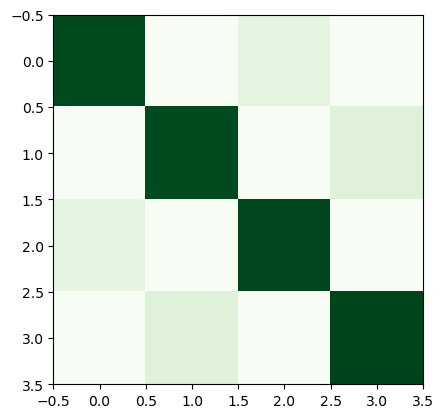

In [6]:

l = lambda x : kv.legendre_normal(x, 100)

matrix_size = 4
matrix = np.zeros((matrix_size,matrix_size))
for i in range(matrix_size):
    for j in range(matrix_size):
        matrix[i,j] = kv.quadrature(lambda x : l(x)[i]*l(x)[j], 100)
print(matrix)

# plot
fig, ax = plt.subplots()


ax.imshow(matrix, cmap=colormaps['Greens'])
plt.show()

[[ 1.00000000e+00 -3.94649591e-17  1.62066541e-15  1.96717642e-15
  -7.79497994e-15  6.48352899e-15 -4.57706789e-15]
 [-4.38017678e-17  1.00000000e+00  1.69309011e-15 -5.38631639e-15
   7.37604422e-15 -1.07171216e-14  7.78717368e-15]
 [ 1.60461922e-15  1.69829428e-15  1.00000000e+00  6.55725474e-15
  -7.00654812e-15  7.47492346e-15 -1.23893951e-14]
 [ 1.96544170e-15 -5.38631639e-15  6.56072419e-15  1.00000000e+00
   6.41327269e-15 -8.25728375e-15  9.99721139e-15]
 [-7.78457160e-15  7.40119771e-15 -6.99960923e-15  6.48092691e-15
   1.00000000e+00  8.83841611e-15 -1.24501104e-14]
 [ 6.47832482e-15 -1.07153869e-14  7.49747486e-15 -8.24861013e-15
   8.83147722e-15  1.00000000e+00  1.26253175e-14]
 [-4.55278176e-15  7.80278619e-15 -1.24102117e-14  1.00058850e-14
  -1.24362326e-14  1.26530730e-14  1.00000000e+00]]


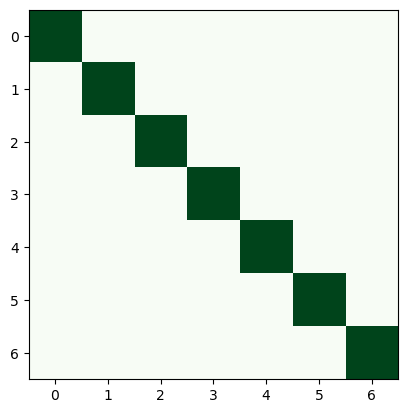

In [13]:
l = lambda x : kv.legendre_normal(x, 6)

n = 50


nodes, weights = kv.nodes_weights(n)

values = l(nodes)


matrix = ((values * weights) @ values.T)
# plot
fig, ax = plt.subplots()

print(matrix)

ax.imshow(matrix, cmap=colormaps['Greens'])
plt.show()


[-0.86113631 -0.33998104  0.33998104  0.86113631] [0.34785485 0.65214515 0.65214515 0.34785485]


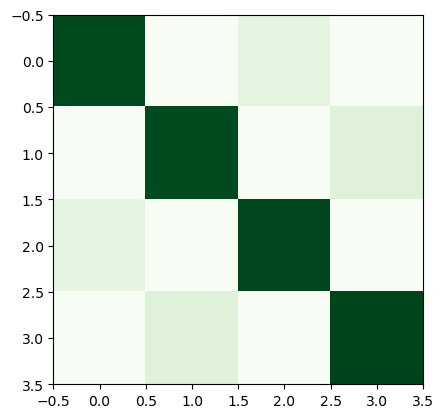

In [2]:
l = lambda x : kv.legendre_normal(x, 100)

matrix_size = 4
matrix = np.zeros((matrix_size,matrix_size))
for i in range(matrix_size):
    for j in range(matrix_size):
        
        matrix[i,j] = kv.quadrature(lambda x : l(x)[i]*l(x)[j], 100)

nodes, weights = kv.nodes_weights(matrix_size)
print(nodes, weights)

# plot
fig, ax = plt.subplots()


ax.imshow(matrix, cmap=colormaps['Greens'])
plt.show()